# Predicting Rainfall Anomalies in the Amazon
## Model Outline:
- Preprocessing
- Multivariate EOF
- Ridge Regression
- Lasso Regression
- Neural Network Regression

Created by David Gotler, 2021

## Preprocessing
### Define a dataframe class to:
- Load in the datasets:
    - feature dataset (ERA5): variables are CAPE, CIN, geopotential, relative humidity
        - lat: (0,-30), lon: (-40,-80)
    - target dataset (GPCC): variable is precipitation
        - lat: (-5,-25), lon: (-50,-70)
- Detrend the dataset by removing linear trends. We want the dataset to be stationary
- Calculate standardized anomalies by subtracting the monthly mean and dividing by standard deviation. We want centered dataset with unit variance.

In [1]:
import numpy as np
import xarray as xr

from matplotlib import pyplot as plt
    
from dataframe import dataframe
# directories
data_dir = 'data/'
features_fname = 'ERA5.features.1950-2019.nc'
target_fname = 'precip.mon.total.1x1.v2020.nc'

# input regions
lat_ft = -30,0
lon_ft = -80,-40
lat_t = -20,-5
lon_t = -70,-50
yrs = 1950,2019
# pack tuple
range_ft =  lat_ft+lon_ft+yrs
range_t = lat_t+lon_t+yrs

# Create df object to store our feature and target datasets
df = dataframe(data_dir,features_fname,target_fname,features_range=range_ft,target_range=range_t)
df.detrend()
df.std_anom()
df.flatten()
df.remove_nan()

C:\Users\david\miniconda3\lib\site-packages\xarray\core\nputils.py:166: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
C:\Users\david\miniconda3\lib\site-packages\xarray\core\nputils.py:166: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
C:\Users\david\miniconda3\lib\site-packages\xarray\core\nputils.py:166: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
C:\Users\david\miniconda3\lib\site-packages\xarray\core\nputils.py:166: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
C:\Users\david\miniconda3\lib\site-packages\xarray\core\nputils.py:166: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
C:\Users\david\miniconda3\lib\site-packages\xarray\core\nputils.py:166: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
C:\Users\david\miniconda3\li

In [133]:
from importlib import reload
import forecast

reload(forecast)
from forecast import get_dataset
from forecast import DirectForecaster,RecursiveForecaster

import hvplot as hv

## Linear Regression
Direct forecasting using linear regression.

mean absolute error on the test set: 0.752


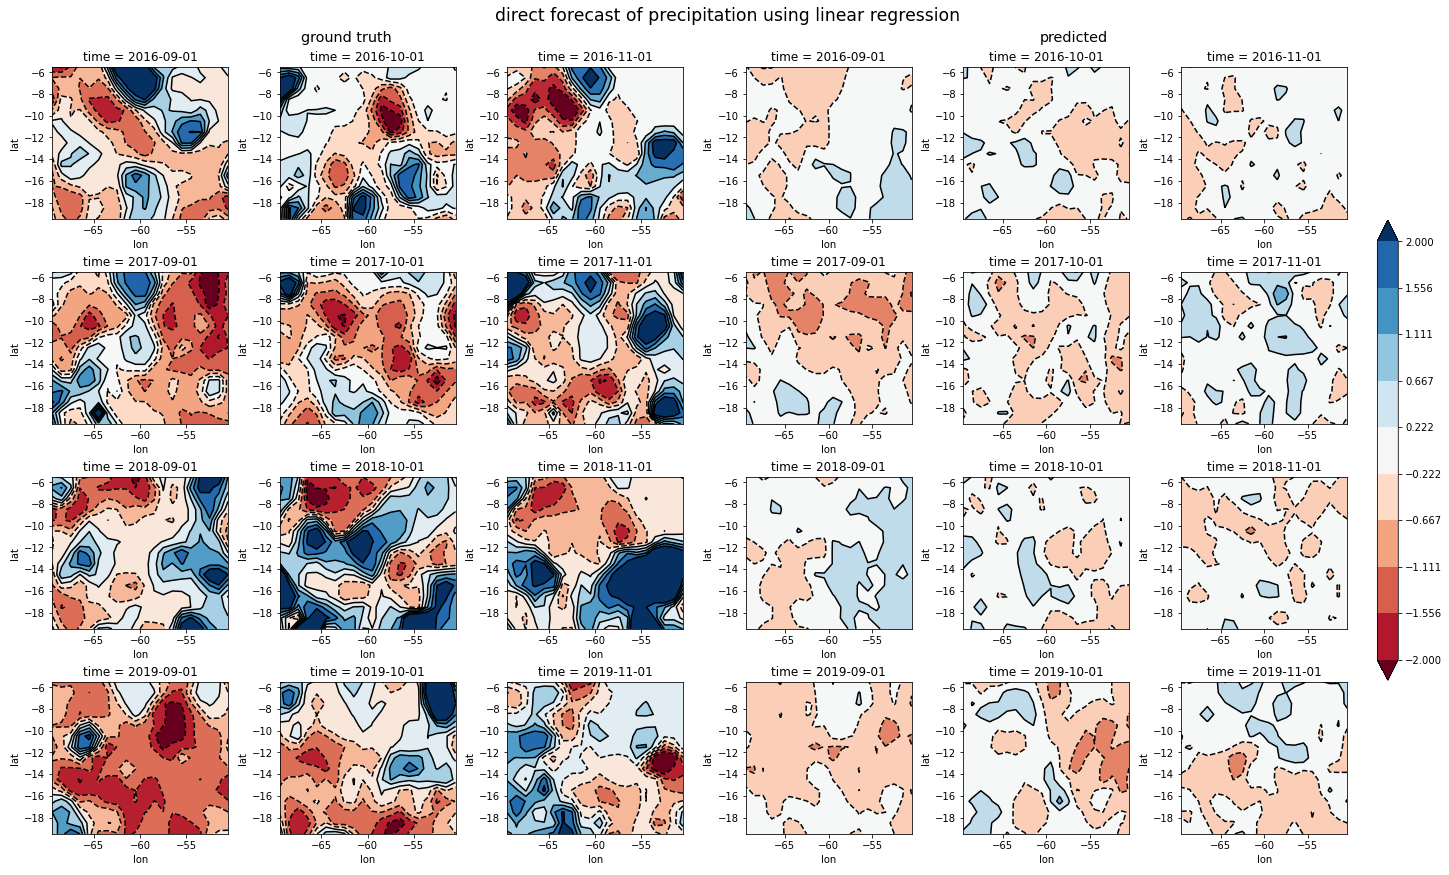

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
forecaster = DirectForecaster(LinearRegression(),lags=3,target_months=[9,10,11],steps=3,include_autoreg=True,avg_lags=True,pca_features=True)
X_train,y_train,X_test,y_test = forecaster.train_test_split(4,df.target_da,df.features_da)
forecaster.fit(X_train,y_train)

y_pred = forecaster.predict(X_test,y_test)

weights = np.abs(np.cos(np.deg2rad(y_test.lat.values)))
print('mean absolute error on the test set: {:.3f}'.format(mean_absolute_error(y_test,y_pred,multioutput=weights)))

y_true_ds = get_dataset(y_test)
y_pred_ds = get_dataset(y_pred)
fig = forecaster.data_plots(y_true_ds,y_pred_ds,model_name='linear regression',forecaster_name='direct forecast')

## Ridge Regression
Direct forecasting using linear regression with L2 (ridge) regularization.

mean absolute error on the test set: 0.750


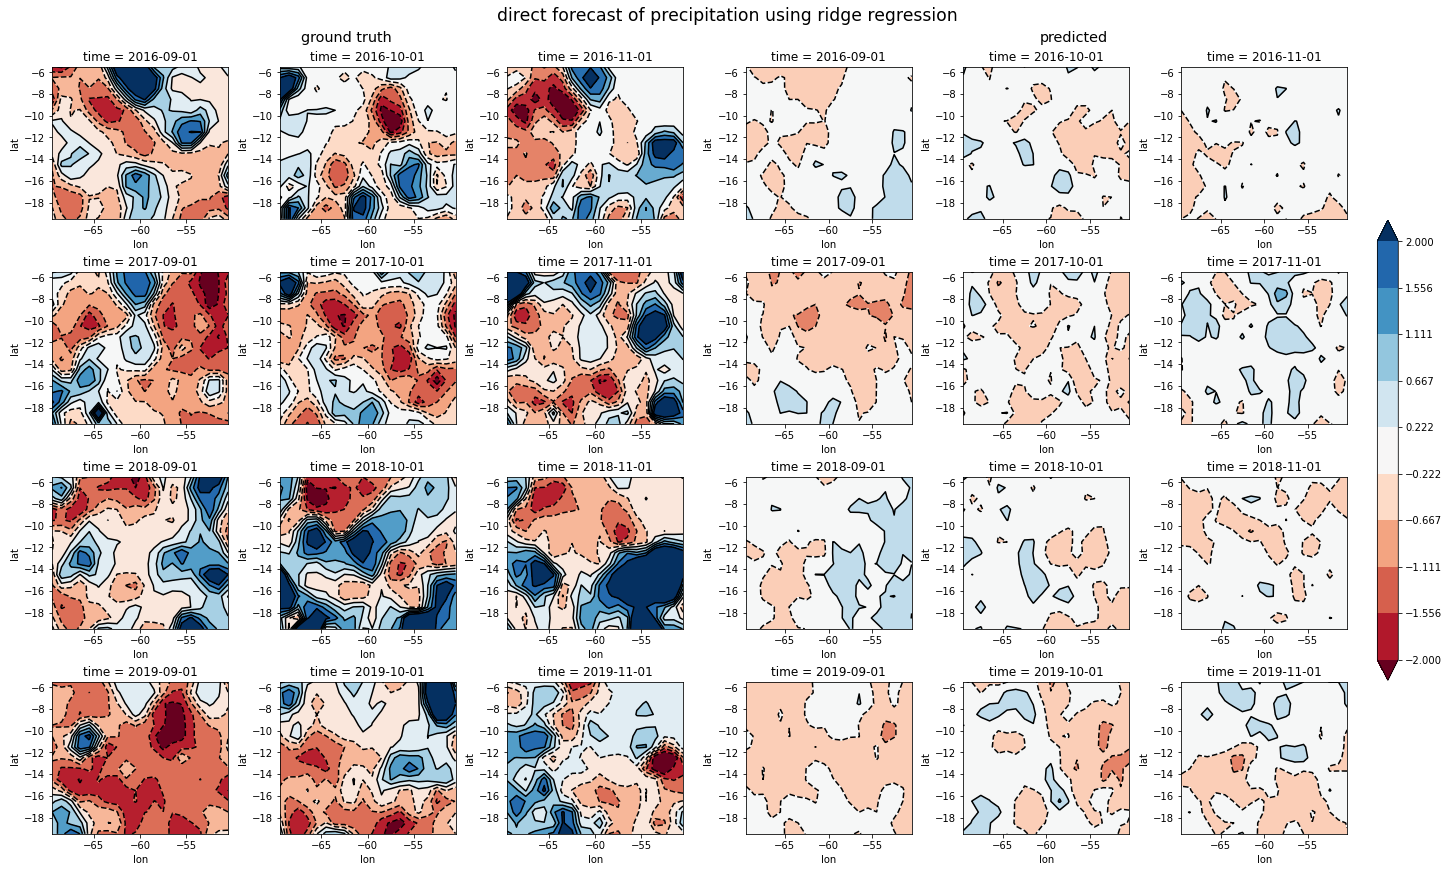

In [142]:
from sklearn.linear_model import Ridge

forecaster = DirectForecaster(Ridge(alpha=10),lags=3,target_months=[9,10,11],steps=3,include_autoreg=True,avg_lags=True,pca_features=True)
X_train,y_train,X_test,y_test = forecaster.train_test_split(4,df.target_da,df.features_da)
forecaster.fit(X_train,y_train)

y_pred = forecaster.predict(X_test,y_test)
weights = np.abs(np.cos(np.deg2rad(y_test.lat.values)))

print('mean absolute error on the test set: {:.3f}'.format(mean_absolute_error(y_test,y_pred,multioutput=weights)))

y_true_ds = get_dataset(y_test)
y_pred_ds = get_dataset(y_pred)
fig = forecaster.data_plots(y_true_ds,y_pred_ds,model_name='ridge regression',forecaster_name='direct forecast')

## Neural Network Regression
Direct forecasting using a neural network with 1 hidden layer with 5 nodes

mean absolute error on the test set: 0.769


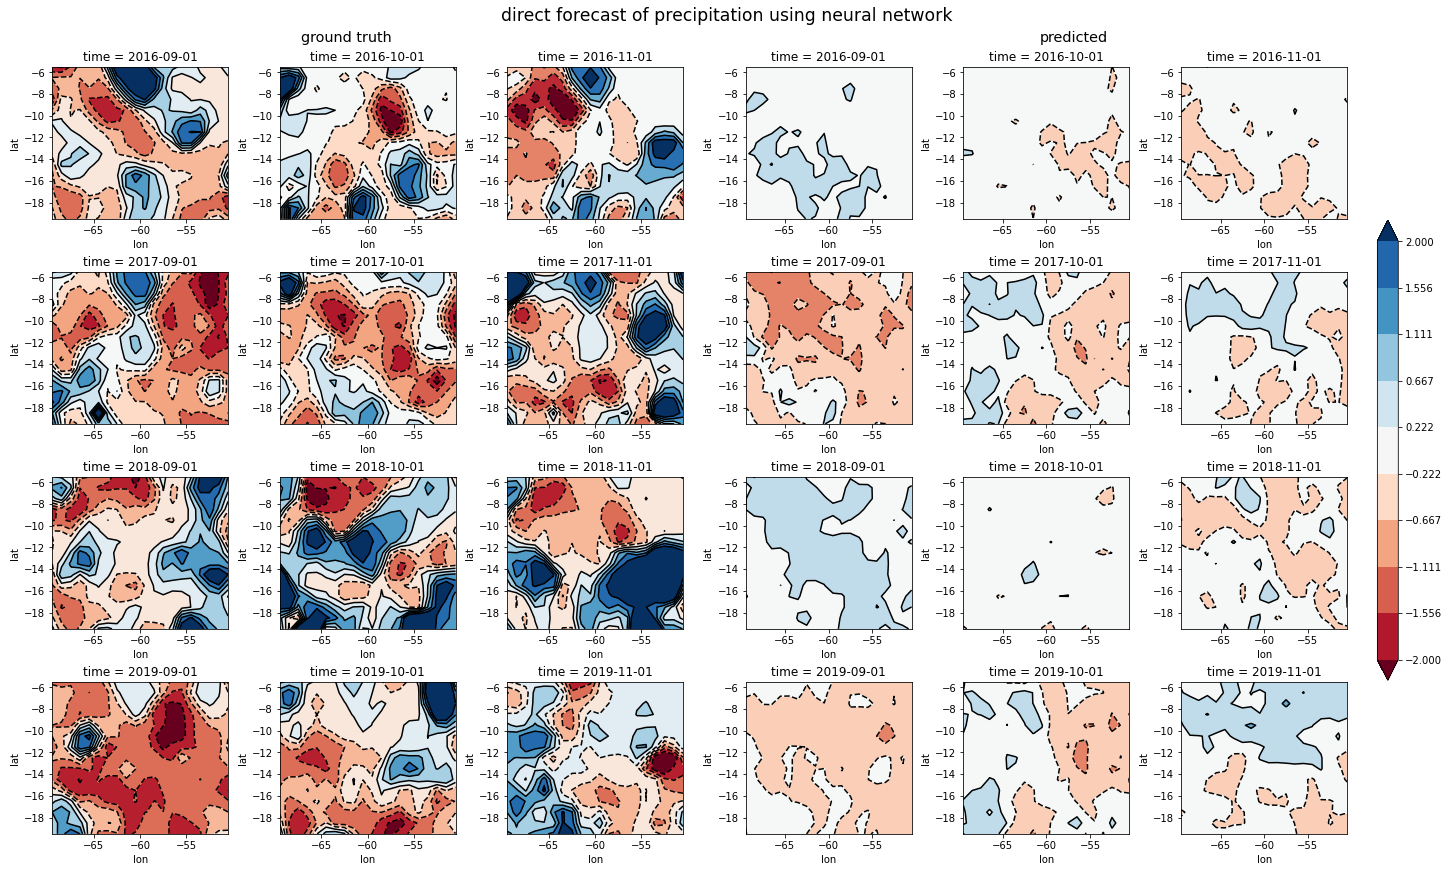

In [143]:
from sklearn.neural_network import MLPRegressor

forecaster = DirectForecaster(MLPRegressor((5,),max_iter=1000),lags=3,target_months=[9,10,11],steps=3,include_autoreg=True,avg_lags=True,pca_features=True)
X_train,y_train,X_test,y_test = forecaster.train_test_split(4,df.target_da,df.features_da)
forecaster.fit(X_train,y_train)

y_pred = forecaster.predict(X_test,y_test)
weights = np.abs(np.cos(np.deg2rad(y_test.lat.values)))

print('mean absolute error on the test set: {:.3f}'.format(mean_absolute_error(y_test,y_pred,multioutput=weights)))

y_true_ds = get_dataset(y_test)
y_pred_ds = get_dataset(y_pred)
fig = forecaster.data_plots(y_true_ds,y_pred_ds,model_name='neural network',forecaster_name='direct forecast')